# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            print(col)
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# inplace=True, 直接替換原df

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [67]:
app_train['YEARS_BIRTH'] =(app_train['DAYS_BIRTH']/365).apply(np.round).astype(int)
# 將年齡天數轉換成年， 並採用四捨五入轉換成整數

bins=[0,20,30,40,50,60,70,np.inf]
app_train['INTERVAL']=pd.cut(app_train['YEARS_BIRTH'],bins)
# 將年齡切分為7個區間

ages=app_train[['TARGET','YEARS_BIRTH','INTERVAL']]
ages.head()

,TARGET,YEARS_BIRTH,INTERVAL
0,1,26,"(20.0, 30.0]"
1,0,46,"(40.0, 50.0]"
2,0,52,"(50.0, 60.0]"
3,0,52,"(50.0, 60.0]"
4,0,55,"(50.0, 60.0]"


              TARGET  YEARS_BIRTH
INTERVAL                         
(0.0, 20.0]        0            0
(20.0, 30.0]    5593        48869
(30.0, 40.0]    7809        82770
(40.0, 50.0]    5725        75509
(50.0, 60.0]    4102        67955
(60.0, 70.0]    1596        32408
(70.0, inf]        0            0


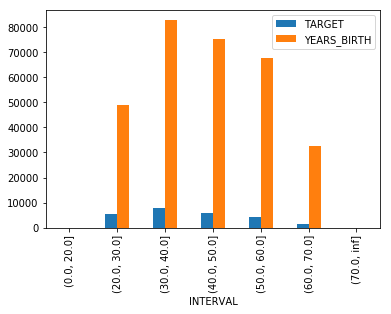

In [70]:
# 計算個別interval中target的次數， 轉換成機率分佈圖

# 利用count()不計算NaN的特性， 僅紀錄TARGET=1的次數
ages['TARGET'].replace({0:np.nan},inplace=True)
result=ages.groupby('INTERVAL').count()

print(result)
result.plot.bar()

              TARGET  YEARS_BIRTH  PERCENTAGE
INTERVAL                                     
(0.0, 20.0]        0            0         NaN
(20.0, 30.0]    5593        48869    0.114449
(30.0, 40.0]    7809        82770    0.094346
(40.0, 50.0]    5725        75509    0.075819
(50.0, 60.0]    4102        67955    0.060363
(60.0, 70.0]    1596        32408    0.049247
(70.0, inf]        0            0         NaN


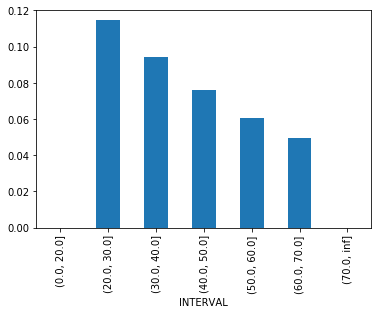

In [71]:
# 計算個別年齡區間的百分比
result['PERCENTAGE']=result['TARGET']/result['YEARS_BIRTH']
print(result)
result['PERCENTAGE'].plot.bar()